In [7]:
%matplotlib inline

In [8]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

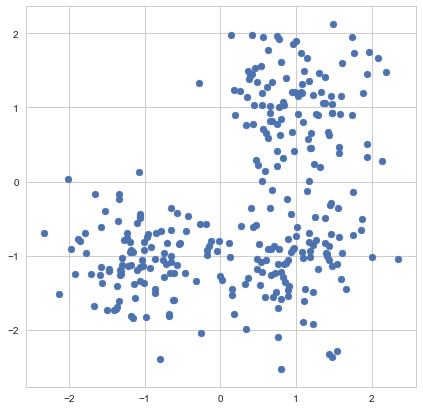

In [9]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [103]:
matrix = []
for x1 in X:
    row = []
    for x2 in X:
        s = -np.linalg.norm(x1 - x2)**2
        row.append(s)
    matrix.append(row)
    
sdf = pd.DataFrame(matrix)

In [212]:
n_samples = S.shape[0]

In [213]:
S = sdf.values.copy()
A = np.zeros((n_samples, n_samples))
R = np.zeros((n_samples, n_samples)) 

In [214]:
N = 300
lam = 0.9
max_iter = 20

In [216]:
for m in range(max_iter):
    for i in range(N):
        for k in range(N):
            tmax = -1e100
            for kk in range(k): 
                uv = S[i, kk] + A[i, kk]
                if uv > tmax:
                    tmax = uv

            for kk in range(N):
                uv = S[i, kk] + A[i, kk]
                if uv > tmax:
                    tmax = uv

            R[i, k] = (1-lam) * S[i, k] - tmax + lam * R[i, k]


    for i in range(N):
        for k in range(N):
            if i == k:
                tsum = 0

                for ii in range(i):
                    tsum += np.maximum(0.0, R[ii, k])

                for ii in range(N): 
                    tsum += np.maximum(0.0, R[ii, k])

                A[i, k] = (1-lam) * tsum + lam * A[i, k]
            else:
                tsum = 0
                maxik = np.maximum(i, k)
                minik = np.minimum(i, k)

                for ii in range(minik):
                    tsum += np.maximum(0.0, R[ii, k])
                for ii in range(minik + 1, maxik):
                    tsum += np.maximum(0.0, R[ii, k])
                for ii in range(maxik + 1, N):
                    tsum += np.maximum(0.0, R[ii, k])

                A[i, k] = (1-lam) * np.minimum(0, R[k,k] + tsum) + lam * A[i,k]
        

center = []
for i in range(N):
    e = R[i,i] + A[i, i]
    if e > 0:
        center.append(i)

idx = []
for i in range(N):
    
    idxForI = 0 
    maxSim = -1e100
    
    for j in range(len(center)):
        c = center[j]
        if S[i, c] > maxSim:
            maxSim = S[i, c]
            idxForI = c
    
    idx.append(idxForI)


KeyboardInterrupt: 

In [ ]:
    
for i in range(N):
    print(idx[i])

In [105]:
n_samples = S.shape[0]
preference = np.median(S)

In [106]:
n_samples, preference

(300, -3.8107687992131307)

In [107]:
random_state = np.random.RandomState(0)

In [108]:
S.flat[::].shape

(90000,)

In [109]:
S.flat[::2].shape

(45000,)

In [110]:
S.flat[::n_samples+1].shape

(300,)

In [111]:
np.trace(S)

0.0

### 대각성분을 미디언값으로 변경

In [112]:
S.flat[::(n_samples + 1)] = preference

In [113]:
np.trace(S)

-1143.2306397639388

In [114]:
preference * 300

-1143.2306397639393

    - eps : (float) The smallest representable positive number such that 1.0 + eps != 1.0. Type of eps is an appropriate floating point type. 
    
    - tiny : (float) The smallest positive usable number. Type of tiny is an appropriate floating point type.

In [116]:
np.finfo(np.double).eps, np.finfo(np.double).tiny

(2.220446049250313e-16, 2.2250738585072014e-308)

In [117]:
# Remove degeneracies
S += ((np.finfo(np.double).eps * S + np.finfo(np.double).tiny * 100) *
  random_state.randn(n_samples, n_samples))

### 계산값 저장 배열

In [115]:
A = np.zeros((n_samples, n_samples))
R = np.zeros((n_samples, n_samples)) 
tmp = np.zeros((n_samples, n_samples))

In [118]:
# Execute parallel affinity propagation updates
convergence_iter = 15
e = np.zeros((n_samples, convergence_iter))

In [119]:
e.shape

(300, 15)

In [120]:
ind = np.arange(n_samples)

In [92]:
max_iter = 200
for it in range(max_iter):
    tmp = np.add(A, S)

SyntaxError: unexpected EOF while parsing (<ipython-input-92-a2d6d33fd391>, line 1)

In [126]:
tmp = np.add(A, S)

### argmax 행 또는 열에 해당하느 최대값의 인덱스 추출

In [127]:
I = np.argmax(tmp, axis=1)

In [152]:
tarr = np.arange(30)
np.random.shuffle(tarr)
tarr = tarr.reshape(5,6)

In [153]:
tarr

array([[25, 26,  7, 15,  9, 11],
       [16, 27, 23,  5, 12, 14],
       [28,  3, 17, 20, 22, 10],
       [24,  1,  8,  6, 21, 19],
       [13, 18,  4,  0,  2, 29]])

In [154]:
np.argmax(tarr, axis=1)

array([1, 1, 0, 0, 5])

---

In [156]:
Y = tmp[ind, I]  # np.max(A + S, axis=1)
tmp[ind, I] = -np.inf
Y2 = np.max(tmp, axis=1)

In [162]:
np.subtract(S, Y[:, None], tmp)
tmp[ind, I] = S[ind, I] - Y2

In [12]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)


x : (300, 2)


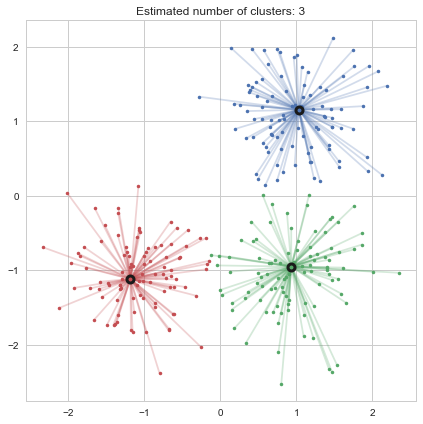

In [8]:
from itertools import cycle
plt.figure(figsize=(7,7)) 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()